# Exploring Data

In [1]:
# pandas, Version-1.3.4
# numpy, Version-1.20.3
# seaborn, Version-0.11.2
# matplotlib, Version-3.4.3
# sklearn, Version-1.0.2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes.csv')

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cleaning Data

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.shape

(768, 9)

In [10]:
np.unique(df.Outcome)

array([0, 1], dtype=int64)

# Outliers

In [11]:
all_features = df.columns
target = 'Outcome'
features = all_features.drop('Outcome')

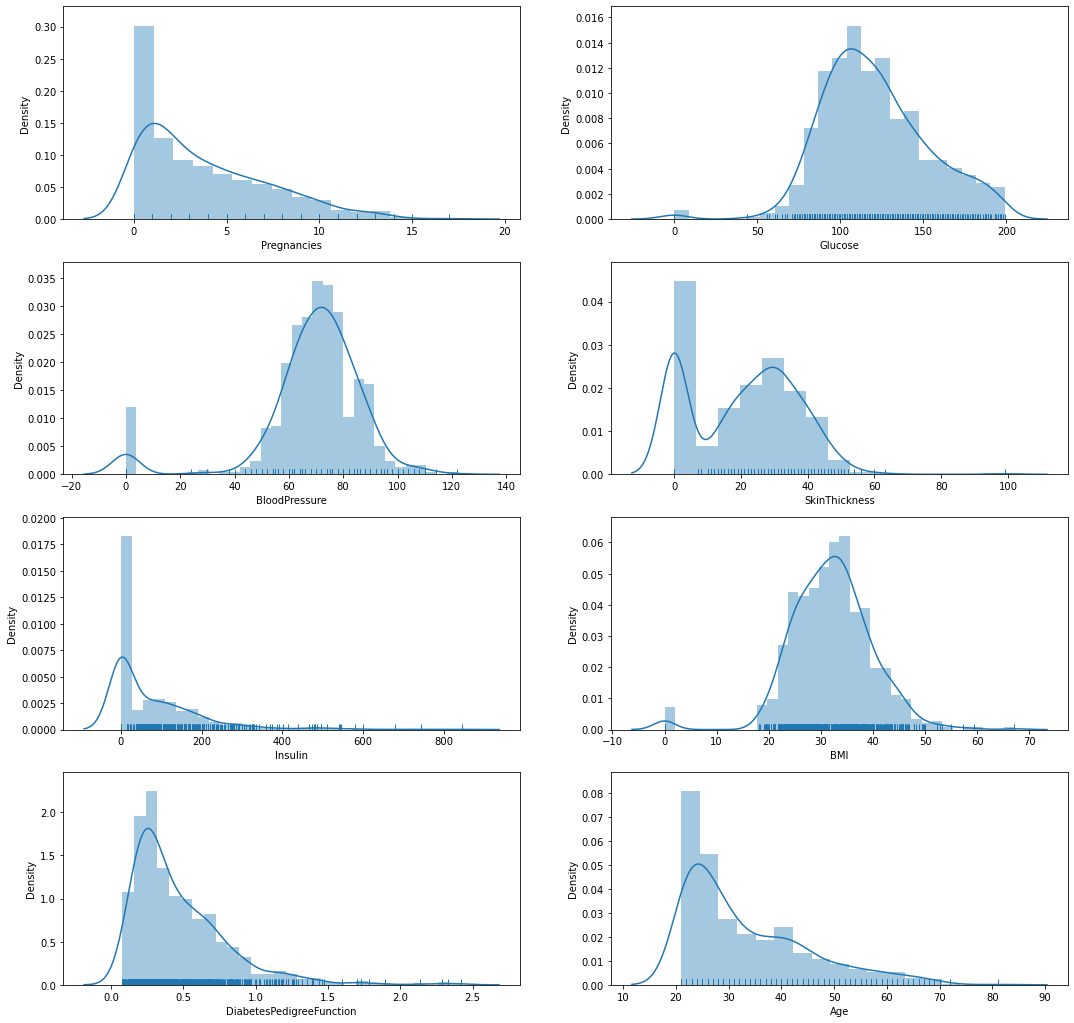

In [21]:
fig, axs = plt.subplots(4, 2, figsize = (18,18))
for col,axidx in zip(df.columns, axs.flat):
    plt.xlabel(col)
    sns.distplot(df[col], rug = True, ax = axidx)

In [22]:
anomalous = df[df == 0].count()
anomalous

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [23]:
anomalous

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [24]:
anomalous = dict(anomalous)
kv_pairs = list(anomalous.items())
for key,value in kv_pairs:
    if (key == 'Outcome') or (key == 'Pregnancies') or (value == 0):
        del anomalous[key]

In [25]:
anomalous

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

In [26]:
df_modified = df[(df.Glucose != 0) & (df.BloodPressure != 0) & (df.BMI != 0)]
df_modified[df == 0].count()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

In [27]:
df_modified.shape

(724, 9)

# Importing Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [29]:
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
#For Dimensionlaity Reduction Algorithms
from sklearn.feature_selection import RFECV

In [31]:
#Used in Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

In [32]:
#Used to scale data
from sklearn.preprocessing import StandardScaler

# Splitting Data

In [33]:
X = df_modified[features]
y = df_modified[target]

In [34]:
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features]) 
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.635022,0.849933,-0.032378,0.862278,-0.722572,0.164562,0.458421,1.416075
1,-0.852861,-1.200262,-0.517370,0.480644,-0.722572,-0.852262,-0.372691,-0.199947
2,1.230175,1.988930,-0.679035,-1.363918,-0.722572,-1.331622,0.593928,-0.114893
3,-0.852861,-1.070091,-0.517370,0.099010,0.081288,-0.634371,-0.926765,-1.050485
4,-1.150438,0.491962,-2.619006,0.862278,0.714115,1.544537,5.460146,-0.029839
...,...,...,...,...,...,...,...,...
763,1.825328,-0.679578,0.290951,1.689150,0.816736,0.062879,-0.914720,2.521775
764,-0.555284,0.003821,-0.194042,0.353433,-0.722572,0.629395,-0.405815,-0.540162
765,0.337445,-0.028722,-0.032378,0.099010,0.235219,-0.910366,-0.691886,-0.285001
766,-0.852861,0.133992,-1.002363,-1.363918,-0.722572,-0.343850,-0.378713,1.160914


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [36]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state = 10, shuffle = True)

# Logistic Regression

In [37]:
log_reg_scores = []

In [38]:
log_reg_1 = LogisticRegression(solver = 'lbfgs', max_iter = 4000)

In [39]:
score_log_reg_1 = cross_val_score(log_reg_1, X_train, y_train, 
                                  cv=strat_k_fold, scoring='accuracy').mean()
score_log_reg_1

0.7702020202020201

In [40]:
log_reg_scores.append(score_log_reg_1)

##### 1.Dimensionality Reduction

In [41]:
log_reg_2 = LogisticRegression(solver = 'lbfgs', max_iter = 4000)

In [42]:
rfecv_log_reg = RFECV(estimator = log_reg_2, step = 1, 
                      cv = strat_k_fold, scoring = 'accuracy')

In [43]:
rfecv_log_reg.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=LogisticRegression(max_iter=4000), scoring='accuracy')

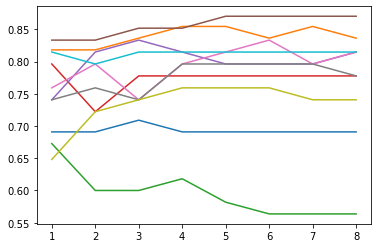

In [44]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_log_reg.grid_scores_)
plt.show()

In [45]:
new_features_log_reg = rfecv_log_reg.get_feature_names_out()
new_features_log_reg

array(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'],
      dtype=object)

In [46]:
X_new_log_reg = X_train[new_features_log_reg]
X_new_log_reg

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
513,-0.555284,-1.005005,-0.750580,0.151271
645,-0.555284,1.142818,1.007073,-1.026137
305,-0.555284,-0.061265,1.050651,-0.782224
373,-0.555284,-0.549407,0.353400,-0.752111
179,0.337445,0.264163,0.963495,1.449130
...,...,...,...,...
442,0.039869,-0.158893,0.106458,-0.737055
234,-0.257708,-1.558233,-0.401954,-0.547345
90,-0.852861,-1.362976,-1.941716,-0.652739
241,0.039869,-1.005005,0.091931,-0.086620


In [47]:
score_log_reg_2 = cross_val_score(log_reg_2, X_new_log_reg, y_train, cv = strat_k_fold, scoring='accuracy').mean()
score_log_reg_2

0.7774747474747474

In [48]:
log_reg_scores.append(score_log_reg_2)

##### 2.Hyper Parameter Tuning

In [49]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid_log_reg = [
    {'C': c_values, 
     'penalty': ['l1'], 
     'solver' : ['liblinear'], 
     'multi_class' : ['ovr']},
    
    {'C': c_values, 'penalty': ['l2'], 
     'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 
     'multi_class' : ['ovr']}]

In [50]:
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, 
                            cv=strat_k_fold, scoring='accuracy')
grid_log_reg.fit(X_new_log_reg, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [51]:
grid_log_reg.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
grid_log_reg.best_estimator_

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

##### 3.Final Model

In [53]:
log_reg_3 = LogisticRegression(C=1, multi_class= 'ovr', 
                               penalty='l1', solver= 'liblinear' )

In [54]:
log_reg_3.fit(X_new_log_reg, y_train)
y_pred_1 = log_reg_3.predict(X_new_log_reg)

In [55]:
score_log_reg_3 = accuracy_score(y_train, y_pred_1)
score_log_reg_3

0.7771639042357275

In [56]:
log_reg_scores.append(score_log_reg_3)

##### 4.Testing

In [125]:
X_test_log_reg = X_test[new_features_log_reg]
X_test_log_reg

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
625,0.039869,-1.037548,0.760130,-0.339567
141,0.337445,-0.516864,1.021599,-0.568424
626,-1.150438,0.101449,-1.128257,-0.809325
696,-0.257708,1.533331,-0.372902,-0.622627
258,-0.852861,2.314358,-0.953944,0.542736
...,...,...,...,...
691,2.718058,1.175361,1.428328,-0.655751
302,0.337445,-1.460604,0.484135,-0.959889
439,0.635022,-0.484321,0.629395,0.759548
552,0.635022,-0.256522,-0.677949,-0.685863


In [126]:
y_pred_2 = log_reg_3.predict(X_test_log_reg)
score_log_reg_4 = accuracy_score(y_test, y_pred_2)
score_log_reg_4

0.7900552486187845

In [127]:
log_reg_scores.append(score_log_reg_4)

In [128]:
log_reg_scores

[0.7702020202020201,
 0.7774747474747474,
 0.7771639042357275,
 0.7900552486187845]

# Support Vector Classification

In [129]:
svc_scores = []

In [130]:
svc_1 = SVC(kernel = 'linear')

In [131]:
score_svc_1 = cross_val_score(svc_1, X_train, y_train, 
                              cv=strat_k_fold, 
                              scoring='accuracy').mean()
score_svc_1

0.7645454545454546

In [132]:
svc_scores.append(score_svc_1)

##### 1.Dimensionality Reduction

In [133]:
rfecv_svc = RFECV(SVC(kernel = 'linear'), step=1, cv=strat_k_fold,scoring='accuracy')
rfecv_svc.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=SVC(kernel='linear'), scoring='accuracy')

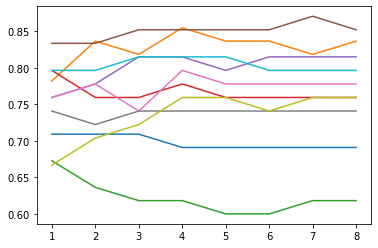

In [134]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_svc.grid_scores_)
plt.show()

In [135]:
new_features_svc = rfecv_svc.get_feature_names_out()
new_features_svc

array(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'],
      dtype=object)

In [136]:
X_new_svc = X_train[new_features_svc]
X_new_svc

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
513,-0.555284,-1.005005,-0.750580,0.151271
645,-0.555284,1.142818,1.007073,-1.026137
305,-0.555284,-0.061265,1.050651,-0.782224
373,-0.555284,-0.549407,0.353400,-0.752111
179,0.337445,0.264163,0.963495,1.449130
...,...,...,...,...
442,0.039869,-0.158893,0.106458,-0.737055
234,-0.257708,-1.558233,-0.401954,-0.547345
90,-0.852861,-1.362976,-1.941716,-0.652739
241,0.039869,-1.005005,0.091931,-0.086620


In [137]:
score_svc_2 = cross_val_score(SVC(kernel = 'linear'), X_new_svc, y_train, cv=strat_k_fold, scoring='accuracy').mean()
score_svc_2

0.7719191919191919

In [138]:
svc_scores.append(score_svc_2)

##### 2.Hyper Parameter Tuning

In [139]:
param_grid_svc ={
                'C' : [0.1, 1, 10, 50, 100],
                'gamma' : [1,0.1,0.01,0.0001],
                'decision_function_shape' : ['ovo', 'ovr']
}

In [140]:
grid_svc = GridSearchCV(SVC(kernel = 'linear'), 
                        param_grid_svc, 
                        cv = strat_k_fold, 
                        scoring = 'accuracy')
grid_svc.fit(X_new_svc, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.0001]},
             scoring='accuracy')

In [141]:
grid_svc.best_params_

{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 1}

In [142]:
grid_svc.best_estimator_

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='linear')

##### 3.Final Model

In [143]:
svc_2 = SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='linear')

In [144]:
svc_2.fit(X_new_svc, y_train)

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='linear')

In [145]:
y_pred_3 = svc_2.predict(X_new_svc)
score_svc_3 = accuracy_score(y_train, y_pred_3)
score_svc_3

0.7771639042357275

In [146]:
svc_scores.append(score_svc_3)

##### 4.Testing

In [147]:
X_test_svc = X_test[new_features_svc]
X_test_svc

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
625,0.039869,-1.037548,0.760130,-0.339567
141,0.337445,-0.516864,1.021599,-0.568424
626,-1.150438,0.101449,-1.128257,-0.809325
696,-0.257708,1.533331,-0.372902,-0.622627
258,-0.852861,2.314358,-0.953944,0.542736
...,...,...,...,...
691,2.718058,1.175361,1.428328,-0.655751
302,0.337445,-1.460604,0.484135,-0.959889
439,0.635022,-0.484321,0.629395,0.759548
552,0.635022,-0.256522,-0.677949,-0.685863


In [148]:
y_pred_4 = svc_2.predict(X_test_svc)
score_svc_4 = accuracy_score(y_test, y_pred_4)
score_svc_4

0.7734806629834254

In [149]:
svc_scores.append(score_svc_4)

In [150]:
svc_scores

[0.7645454545454546,
 0.7719191919191919,
 0.7771639042357275,
 0.7734806629834254]

# Decision Tree Classifier

In [151]:
dt_scores = []

In [152]:
dt_1 = DecisionTreeClassifier()

In [153]:
score_dt_1 = cross_val_score(dt_1, X_train, y_train, 
                             cv = strat_k_fold, 
                             scoring = 'accuracy').mean()
score_dt_1

0.7036700336700337

In [154]:
dt_scores.append(score_dt_1)

##### 1.Dimensionality Reduction

In [155]:
dt_2 = DecisionTreeClassifier()

In [156]:
rfecv_dt = RFECV(estimator = dt_2, 
                 step = 1, 
                 cv = strat_k_fold, 
                 scoring = 'accuracy')
rfecv_dt.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

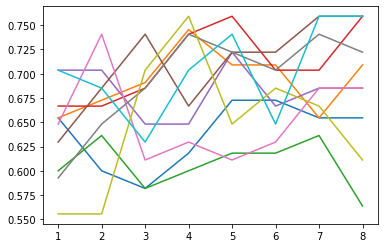

In [157]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_dt.grid_scores_)
plt.show()

In [158]:
new_features_dt = rfecv_dt.get_feature_names_out()
new_features_dt

array(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [159]:
X_new_dt = X_train[new_features_dt]
X_new_dt

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
513,-0.555284,-1.005005,-0.840699,-0.722572,-0.750580,0.151271,-0.965431
645,-0.555284,1.142818,0.129287,3.040180,1.007073,-1.026137,-0.285001
305,-0.555284,-0.061265,0.290951,0.175357,1.050651,-0.782224,-0.370055
373,-0.555284,-0.549407,-1.164027,0.081288,0.353400,-0.752111,-0.710270
179,0.337445,0.264163,0.775944,-0.722572,0.963495,1.449130,0.310376
...,...,...,...,...,...,...,...
442,0.039869,-0.158893,-0.679035,0.303633,0.106458,-0.737055,-0.795323
234,-0.257708,-1.558233,-0.355706,-0.337745,-0.401954,-0.547345,-0.880377
90,-0.852861,-1.362976,-1.406524,-0.722572,-1.941716,-0.652739,-1.050485
241,0.039869,-1.005005,-0.194042,0.029978,0.091931,-0.086620,-0.965431


In [160]:
score_dt_2 = cross_val_score(dt_2, X_new_dt, y_train, cv = strat_k_fold, scoring = 'accuracy').mean()
score_dt_2

0.6872390572390572

In [161]:
dt_scores.append(score_dt_2)

##### 2.Hyper Parameter Tuning

In [165]:
param_grid_dt={"splitter":["best","random"],
               "criterion" : ["gini", "entropy"],
            "max_depth" : range(2,11),
           "min_samples_leaf": range(1,11),
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes": range(10,110,10)}

In [166]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), 
                       param_grid = param_grid_dt, 
                       cv = strat_k_fold, 
                       scoring = 'accuracy')
grid_dt.fit(X_new_dt, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': range(10, 110, 10),
                         'min_samples_leaf': range(1, 11),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [167]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 7,
 'splitter': 'best'}

In [168]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='log2', max_leaf_nodes=50,
                       min_samples_leaf=7)

##### 3.Final Model 

In [169]:
dt_3 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_weight_fraction_leaf=0.1)

In [170]:
dt_3.fit(X_new_dt, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_weight_fraction_leaf=0.1)

In [171]:
y_pred_5 = dt_3.predict(X_new_dt)
score_dt_3 = accuracy_score(y_train, y_pred_5)
score_dt_3

0.7790055248618785

In [172]:
dt_scores.append(score_dt_3)

##### 4.Testing

In [173]:
X_test_dt = X_test[new_features_dt]
X_test_dt

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
625,0.039869,-1.037548,1.260937,-0.260780,0.760130,-0.339567,-0.370055
141,0.337445,-0.516864,0.775944,-0.722572,1.021599,-0.568424,0.395430
626,-1.150438,0.101449,-0.355706,-0.722572,-1.128257,-0.809325,-1.050485
696,-0.257708,1.533331,0.129287,0.346392,-0.372902,-0.622627,-0.199947
258,-0.852861,2.314358,-1.810684,2.484319,-0.953944,0.542736,-0.795323
...,...,...,...,...,...,...,...
691,2.718058,1.175361,3.362572,-0.722572,1.428328,-0.655751,0.905752
302,0.337445,-1.460604,0.775944,-0.363400,0.484135,-0.959889,0.140268
439,0.635022,-0.484321,1.260937,-0.722572,0.629395,0.759548,-0.199947
552,0.635022,-0.256522,1.260937,-0.722572,-0.677949,-0.685863,2.776936


In [174]:
y_pred_6 = dt_3.predict(X_test_dt)
score_dt_4 = accuracy_score(y_test, y_pred_6)
score_dt_4

0.8011049723756906

In [175]:
dt_scores.append(score_dt_4)

In [176]:
dt_scores

[0.7036700336700337,
 0.6872390572390572,
 0.7790055248618785,
 0.8011049723756906]

# Random Forest Classifier

In [177]:
rf_scores = []

In [178]:
rf_1 = RandomForestClassifier()

In [179]:
score_rf_1 = cross_val_score(rf_1, X_train, y_train, 
                             cv = strat_k_fold, 
                             scoring = 'accuracy').mean()
score_rf_1

0.7516498316498317

In [180]:
rf_scores.append(score_rf_1)

##### 1.Dimensionality Reduction

In [181]:
rfecv_rf = RFECV(estimator = RandomForestClassifier(), 
                 step = 1, 
                 cv = strat_k_fold, 
                 scoring = 'accuracy')
rfecv_rf.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=RandomForestClassifier(), scoring='accuracy')

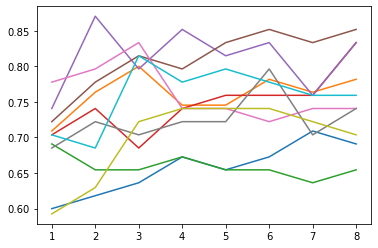

In [182]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_rf.grid_scores_)
plt.show()

In [183]:
new_features_rf = rfecv_rf.get_feature_names_out()
new_features_rf

array(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [184]:
X_new_rf = X_train[new_features_rf]
X_new_rf

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
513,-0.555284,-1.005005,-0.840699,-0.750580,0.151271,-0.965431
645,-0.555284,1.142818,0.129287,1.007073,-1.026137,-0.285001
305,-0.555284,-0.061265,0.290951,1.050651,-0.782224,-0.370055
373,-0.555284,-0.549407,-1.164027,0.353400,-0.752111,-0.710270
179,0.337445,0.264163,0.775944,0.963495,1.449130,0.310376
...,...,...,...,...,...,...
442,0.039869,-0.158893,-0.679035,0.106458,-0.737055,-0.795323
234,-0.257708,-1.558233,-0.355706,-0.401954,-0.547345,-0.880377
90,-0.852861,-1.362976,-1.406524,-1.941716,-0.652739,-1.050485
241,0.039869,-1.005005,-0.194042,0.091931,-0.086620,-0.965431


In [185]:
score_rf_2 = cross_val_score(RandomForestClassifier(), X_new_rf, y_train, cv = strat_k_fold, scoring = 'accuracy').mean()
score_rf_2

0.7535353535353535

In [186]:
rf_scores.append(score_rf_2)

##### 2.Hyper Parameter Tuning

In [187]:
param_grid_rf ={"criterion" : ["gini", "entropy"],
            "max_depth" : range(2,6),
           "min_samples_leaf": range(1,6),
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes": range(10,40,10),
              "n_estimators" : range(10,40,10)}

In [188]:
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_grid_rf,
                       cv = strat_k_fold, 
                       scoring = 'accuracy')
grid_rf.fit(X_new_rf, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': range(10, 40, 10),
                         'min_samples_leaf': range(1, 6),
                         'n_estimators': range(10, 40, 10)},
             scoring='accuracy')

In [189]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 4,
 'n_estimators': 10}

In [190]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=20,
                       min_samples_leaf=4, n_estimators=10)

##### 3.Final Model

In [191]:
rf_2 = RandomForestClassifier(criterion='entropy', 
                              max_depth=5, 
                              max_leaf_nodes=20, 
                              min_samples_leaf=4, 
                              n_estimators=30)

In [192]:
rf_2.fit(X_new_rf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20,
                       min_samples_leaf=4, n_estimators=30)

In [193]:
y_pred_7 = rf_2.predict(X_new_rf)
score_rf_3 = accuracy_score(y_train, y_pred_7)
score_rf_3

0.8379373848987108

In [194]:
rf_scores.append(score_rf_3)

##### 4.Testing

In [195]:
X_test_rf = X_test[new_features_rf]
X_test_rf

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
625,0.039869,-1.037548,1.260937,0.760130,-0.339567,-0.370055
141,0.337445,-0.516864,0.775944,1.021599,-0.568424,0.395430
626,-1.150438,0.101449,-0.355706,-1.128257,-0.809325,-1.050485
696,-0.257708,1.533331,0.129287,-0.372902,-0.622627,-0.199947
258,-0.852861,2.314358,-1.810684,-0.953944,0.542736,-0.795323
...,...,...,...,...,...,...
691,2.718058,1.175361,3.362572,1.428328,-0.655751,0.905752
302,0.337445,-1.460604,0.775944,0.484135,-0.959889,0.140268
439,0.635022,-0.484321,1.260937,0.629395,0.759548,-0.199947
552,0.635022,-0.256522,1.260937,-0.677949,-0.685863,2.776936


In [196]:
y_pred_8 = rf_2.predict(X_test_rf)
score_rf_4 = accuracy_score(y_test, y_pred_8)
score_rf_4

0.7790055248618785

In [197]:
rf_scores.append(score_rf_4)

In [198]:
rf_scores

[0.7516498316498317,
 0.7535353535353535,
 0.8379373848987108,
 0.7790055248618785]

# Gradient Boosting Classifier

In [199]:
gb_scores = []

In [200]:
gb_1 = GradientBoostingClassifier()

In [201]:
score_gb_1 = cross_val_score(gb_1, X_train, y_train, 
                             cv = strat_k_fold, 
                             scoring = 'accuracy').mean()
score_gb_1

0.7461616161616161

In [202]:
gb_scores.append(score_gb_1)

##### 1.Dimensionality Reduction

In [203]:
rfecv_gb = RFECV(GradientBoostingClassifier(), 
                 step=1, 
                 cv=strat_k_fold, 
                 scoring='accuracy')
rfecv_gb.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=GradientBoostingClassifier(), scoring='accuracy')

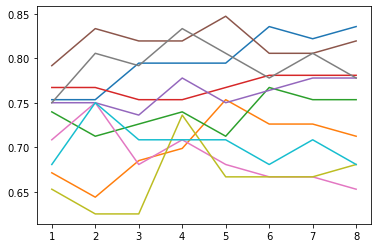

In [204]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_gb.grid_scores_)
plt.show()

In [205]:
new_features_gb = rfecv_gb.get_feature_names_out()
new_features_gb

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [206]:
X_new_gb = X_train[new_features_gb]
X_new_gb

,Glucose,BMI,DiabetesPedigreeFunction,Age
513,-1.005005,-0.750580,0.151271,-0.965431
645,1.142818,1.007073,-1.026137,-0.285001
305,-0.061265,1.050651,-0.782224,-0.370055
373,-0.549407,0.353400,-0.752111,-0.710270
179,0.264163,0.963495,1.449130,0.310376
...,...,...,...,...
442,-0.158893,0.106458,-0.737055,-0.795323
234,-1.558233,-0.401954,-0.547345,-0.880377
90,-1.362976,-1.941716,-0.652739,-1.050485
241,-1.005005,0.091931,-0.086620,-0.965431


In [207]:
score_gb_2 = cross_val_score(GradientBoostingClassifier(), X_new_gb, y_train, cv = strat_k_fold, scoring = 'accuracy').mean()
score_gb_2

0.7334006734006734

In [208]:
gb_scores.append(score_gb_2)

##### 2.Hyper Parameter Tuning

In [209]:
gb_1.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [210]:
param_grid_gb = {
                "learning_rate": [0.0001, 0.01, 0.1, 1],
                "n_estimators" : range(10,40,10),
                "min_samples_leaf": range(1,6),
                "max_depth" : range(2,6),
                "max_features":["auto","log2","sqrt",None],
                "max_leaf_nodes": range(10,40,10)                
}

In [211]:
grid_gb = GridSearchCV(GradientBoostingClassifier(), 
                       param_grid_gb, 
                       cv = strat_k_fold, 
                       scoring = 'accuracy')
grid_gb.fit(X_new_gb, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1],
                         'max_depth': range(2, 6),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': range(10, 40, 10),
                         'min_samples_leaf': range(1, 6),
                         'n_estimators': range(10, 40, 10)},
             scoring='accuracy')

In [212]:
grid_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'n_estimators': 30}

In [213]:
grid_gb.best_estimator_

GradientBoostingClassifier(max_features='log2', max_leaf_nodes=10,
                           min_samples_leaf=5, n_estimators=30)

##### 3.Final Model

In [214]:
gb_2 = GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features='log2',
                           max_leaf_nodes=30, min_samples_leaf=2,
                           n_estimators=10)

In [215]:
gb_2.fit(X_new_gb, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features='log2',
                           max_leaf_nodes=30, min_samples_leaf=2,
                           n_estimators=10)

In [216]:
y_pred_9 = gb_2.predict(X_new_gb)
score_gb_3 = accuracy_score(y_train, y_pred_9)
score_gb_3

0.8287292817679558

In [217]:
gb_scores.append(score_gb_3)

##### 4.Testing

In [218]:
X_test_gb = X_test[new_features_gb]
X_test_gb

,Glucose,BMI,DiabetesPedigreeFunction,Age
625,-1.037548,0.760130,-0.339567,-0.370055
141,-0.516864,1.021599,-0.568424,0.395430
626,0.101449,-1.128257,-0.809325,-1.050485
696,1.533331,-0.372902,-0.622627,-0.199947
258,2.314358,-0.953944,0.542736,-0.795323
...,...,...,...,...
691,1.175361,1.428328,-0.655751,0.905752
302,-1.460604,0.484135,-0.959889,0.140268
439,-0.484321,0.629395,0.759548,-0.199947
552,-0.256522,-0.677949,-0.685863,2.776936


In [219]:
y_pred_10 = gb_2.predict(X_test_gb)
score_gb_4 = accuracy_score(y_test, y_pred_10)
score_gb_4

0.7900552486187845

In [220]:
gb_scores.append(score_gb_4)

In [221]:
gb_scores

[0.7461616161616161,
 0.7334006734006734,
 0.8287292817679558,
 0.7900552486187845]

# Extra Trees Classifier

In [228]:
et_scores = []

In [229]:
et_1 = ExtraTreesClassifier(random_state = 42)

In [230]:
score_et_1 = cross_val_score(et_1, X_train, y_train, 
                             cv = strat_k_fold, 
                             scoring = 'accuracy').mean()
score_et_1

0.7442760942760944

In [231]:
et_scores.append(score_et_1)

##### 1.Dimensionality Reduction

In [232]:
rfecv_et = RFECV(ExtraTreesClassifier(random_state = 42), 
                 step = 1, 
                 cv = strat_k_fold, 
                 scoring = 'accuracy')
rfecv_et.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
      estimator=ExtraTreesClassifier(random_state=42), scoring='accuracy')

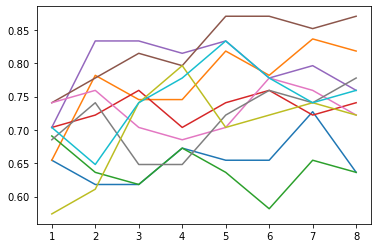

In [233]:
plt.plot(range(1, len(rfecv_log_reg.grid_scores_) + 1), rfecv_et.grid_scores_)
plt.show()

In [234]:
new_features_et = rfecv_et.get_feature_names_out()
new_features_et

array(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [235]:
X_new_et = X_train[new_features_et]
X_new_et

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
513,-0.555284,-1.005005,-0.840699,-0.722572,-0.750580,0.151271,-0.965431
645,-0.555284,1.142818,0.129287,3.040180,1.007073,-1.026137,-0.285001
305,-0.555284,-0.061265,0.290951,0.175357,1.050651,-0.782224,-0.370055
373,-0.555284,-0.549407,-1.164027,0.081288,0.353400,-0.752111,-0.710270
179,0.337445,0.264163,0.775944,-0.722572,0.963495,1.449130,0.310376
...,...,...,...,...,...,...,...
442,0.039869,-0.158893,-0.679035,0.303633,0.106458,-0.737055,-0.795323
234,-0.257708,-1.558233,-0.355706,-0.337745,-0.401954,-0.547345,-0.880377
90,-0.852861,-1.362976,-1.406524,-0.722572,-1.941716,-0.652739,-1.050485
241,0.039869,-1.005005,-0.194042,0.029978,0.091931,-0.086620,-0.965431


In [236]:
score_et_2 = cross_val_score(ExtraTreesClassifier(random_state = 42), X_new_et, y_train, cv=strat_k_fold, scoring='accuracy').mean()
score_et_2

0.7736700336700336

In [237]:
et_scores.append(score_et_2)

##### 2.Hyper Parameter Tuning

In [238]:
param_grid_et ={"criterion" : ["gini", "entropy"],
            "max_depth" : range(2,6),
           "min_samples_leaf": range(1,6),
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes": range(10,40,10),
              "n_estimators" : range(10,50,10)}

In [239]:
grid_et = GridSearchCV(ExtraTreesClassifier(random_state = 42), 
                       param_grid_et, 
                       cv = strat_k_fold, 
                       scoring = 'accuracy')
grid_et.fit(X_new_et, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': range(10, 40, 10),
                         'min_samples_leaf': range(1, 6),
                         'n_estimators': range(10, 50, 10)},
             scoring='accuracy')

In [240]:
grid_et.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 2,
 'n_estimators': 30}

In [241]:
grid_et.best_estimator_

ExtraTreesClassifier(max_depth=5, max_features=None, max_leaf_nodes=30,
                     min_samples_leaf=2, n_estimators=30, random_state=42)

##### 3.Final Model

In [242]:
et_2 = ExtraTreesClassifier(max_depth=5, max_features=None, max_leaf_nodes=30,
                     min_samples_leaf=2, n_estimators=30, random_state=42)

In [243]:
et_2.fit(X_new_et, y_train)

ExtraTreesClassifier(max_depth=5, max_features=None, max_leaf_nodes=30,
                     min_samples_leaf=2, n_estimators=30, random_state=42)

In [244]:
y_pred_11 = et_2.predict(X_new_et)
score_et_3 = accuracy_score(y_train, y_pred_11)
score_et_3

0.8121546961325967

In [245]:
et_scores.append(score_et_3)

##### 4.Testing

In [246]:
X_test_et = X_test[new_features_et]
X_test_et

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
625,0.039869,-1.037548,1.260937,-0.260780,0.760130,-0.339567,-0.370055
141,0.337445,-0.516864,0.775944,-0.722572,1.021599,-0.568424,0.395430
626,-1.150438,0.101449,-0.355706,-0.722572,-1.128257,-0.809325,-1.050485
696,-0.257708,1.533331,0.129287,0.346392,-0.372902,-0.622627,-0.199947
258,-0.852861,2.314358,-1.810684,2.484319,-0.953944,0.542736,-0.795323
...,...,...,...,...,...,...,...
691,2.718058,1.175361,3.362572,-0.722572,1.428328,-0.655751,0.905752
302,0.337445,-1.460604,0.775944,-0.363400,0.484135,-0.959889,0.140268
439,0.635022,-0.484321,1.260937,-0.722572,0.629395,0.759548,-0.199947
552,0.635022,-0.256522,1.260937,-0.722572,-0.677949,-0.685863,2.776936


In [247]:
y_pred_12 = et_2.predict(X_test_et)
score_et_4 = accuracy_score(y_test, y_pred_12)
score_et_4

0.7624309392265194

In [248]:
et_scores.append(score_et_4)

In [249]:
et_scores

[0.7442760942760944,
 0.7736700336700336,
 0.8121546961325967,
 0.7624309392265194]

In [251]:
models = pd.DataFrame({
    'Events \\ Models' : ['Initial','After Dimensionality Reduction',
                          'Final Model after Hyper Parameter Tuning','Testing Scores'],
    'Logistics Regression (Accuracy Scores)' : log_reg_scores,
    'Support Vector Classifier (Accuracy Scores)' : svc_scores,
    'Decision Tree Classifier (Accuracy Scores)' : dt_scores,
    'Random Forest Classifier (Accuracy Scores)' : rf_scores,
    'Gradient Boosting Classifier (Accuracy Scores)' : gb_scores,
    'Extra Trees Classifier (Accuracy Scores)' : et_scores
})

In [252]:
models

,Events \ Models,Logistics Regression (Accuracy Scores),Support Vector Classifier (Accuracy Scores),Decision Tree Classifier (Accuracy Scores),Random Forest Classifier (Accuracy Scores),Gradient Boosting Classifier (Accuracy Scores),Extra Trees Classifier (Accuracy Scores)
0,Initial,0.770202,0.764545,0.703670,0.751650,0.746162,0.744276
1,After Dimensionality Reduction,0.777475,0.771919,0.687239,0.753535,0.733401,0.773670
2,Final Model after Hyper Parameter Tuning,0.777164,0.777164,0.779006,0.837937,0.828729,0.812155
3,Testing Scores,0.790055,0.773481,0.801105,0.779006,0.790055,0.762431
